# <span style="font-family:Georgia; text-align:center;">Modelación de reacciones químicas con EDOs y **ley de acción de masas** </span>
<span style="font-family:Georgia;">

Consideremos la reacción reversible:

 $$A + B \;\xrightleftharpoons[k_{2}]{k_1}\; C + D.$$



Denotaremos por
$$
\alpha=[A],\quad \beta=[B],\quad \gamma=[C],\quad \delta=[D],
$$
y supondremos mezcla homogénea y volumen constante.



<span style="font-family:Georgia;">

La ley de acción de masas (para reacciones elementales) afirma que la **velocidad** de una reacción es proporcional al **producto de las concentraciones de los reactivos**.

- Para la reacción directa $A+B\to C+D$, la probabilidad de que **choquen** una partícula de $A$ y una de $B$ en un pequeño intervalo de tiempo es proporcional a $\alpha\beta$, mientras que la probabilidad de que **reaccionen** es $k_1$. Por ello la **velocidad directa** es
$$
v_f = k_1\,\alpha\,\beta.
$$
- Para la reacción inversa $C+D\to A+B$, análogamente
$$
v_r = k_2\,\gamma\,\delta.
$$

Los **productos** $\alpha\beta$ y $\gamma\delta$ representan el número de **pares reactivos** disponibles por unidad de volumen; las constantes $k_1,k_2>0$ absorben la física microscópica (probabilidad de reacción dado el choque, temperatura, etc.).


<span style="font-family:Georgia;">

Es decir,
$$
\dot\alpha=\dot\beta=-k_1\alpha\beta+k_2\gamma\delta,\qquad
\dot\gamma=\dot\delta=+k_1\alpha\beta-k_2\gamma\delta.
$$

- Los **reactivos** de la dirección directa ($A,B$) **disminuyen** cuando domina $v_f$ (signo $-$) y **aumentan** cuando domina $v_r$ (signo $+$).
- Los **productos** ($C,D$) tienen el **signo opuesto**.


## <span style="font-family:Georgia; text-align:center;">Ejemplo — Autocatálisis</span>



<span style="font-family:Georgia;">

Considere la reacción química modelo
$$
A + X \;\xrightleftharpoons[k_{-1}]{k_1}\; 2X,
$$
en la que una molécula de $X$ se combina con una de $A$ para formar dos moléculas de $X$. La sustancia $X$ **estimula su propia producción** (autocatálisis) y existe una **reacción de regreso** en la que $2X$ retorna a $A+X$.

De acuerdo con la **ley de acción de masas**, la velocidad de una reacción elemental es proporcional al producto de las concentraciones de los reactivos. Denotamos por $x=[X]$ y $a=[A]$ (con $a$ constante debido a un gran excedente de $A$). Entonces la ecuación cinética para $x$ es
$$
\dot x \;=\; k_1\,a\,x \;-\; k_{-1}\,x^2,
$$
donde $k_1,k_{-1}>0$ son constantes de velocidad.

## <span style="font-family:Georgia; text-align:center;">Equilibrios y estabilidad </span>
<span style="font-family:Georgia;">

Sea $f(x)=k_1 a x - k_{-1}x^2$. Los **equilibrios** satisfacen $f(x^*)=0$:
$$
x^* = 0, \qquad x^* = \frac{k_1 a}{k_{-1}} \;=:\; K .
$$

La **linealización** alrededor de un equilibrio usa $f'(x)=k_1 a - 2k_{-1}x$.
- En $x^*=0$: $f'(0)=k_1 a$.
  - Si $a>0$, entonces $f'(0)>0$ $\Rightarrow$ **inestable**.
- En $x^*=K=\dfrac{k_1 a}{k_{-1}}$: 
  $$
  f'(K)=k_1 a - 2k_{-1}\,K = k_1 a - 2k_{-1}\cdot\frac{k_1 a}{k_{-1}} = -\,k_1 a<0,
  $$
  por lo que $K$ es **estable** (atractor) cuando $a>0$.

> Interpretación: $x=0$ representa la extinción de $X$; $x=K$ es el **estado estacionario positivo** sostenido por la autocatálisis y limitado por la reacción de regreso.

## <span style="font-family:Georgia; text-align:center;">Solución explícita tipo logística </span>
<span style="font-family:Georgia;"> 

La ecuación puede escribirse como
$$
\dot x = r\,x\Big(1-\frac{x}{K}\Big), \qquad r:=k_1 a,\quad K:=\frac{k_1 a}{k_{-1}}.
$$
Su solución para condición inicial $x(0)=x_0$ es
$$
x(t)\;=\;\frac{K\,x_0}{\,x_0+(K-x_0)\,e^{-r t}\,}.
$$

- Si $0<x_0<K$, $x(t)\nearrow K$ monótonamente.
- Si $x_0>K$, $x(t)\searrow K$.
- Si $x_0=0$, permanece en $0$ (pero ese equilibrio es inestable para $a>0$).

## <span style="font-family:Georgia; text-align:center;">Bifurcación</span>
<span style="font-family:Georgia;"> 

Si permitimos que $a$ cambie de signo (matemáticamente), entonces:
- Para $a<0$: $r=k_1 a<0$ y el único equilibrio **no negativo** es $x^*=0$, que resulta **estable** ($f'(0)=k_1 a<0$).
- Para $a>0$: aparecen dos equilibrios $x^*=0$ (**inestable**) y $x^*=K>0$ (**estable**).  
- En $a=0$: ambos ramas **colisionan** en $x=0$ y **se intercambia** la estabilidad.

Esto es una **bifurcación transcrítica** en $(a,x)=(0,0)$. Físicamente trabajamos con $x\ge 0$ y típicamente $a>0$, por lo que observamos el equilibrio positivo estable.

In [2]:

# Parámetros base
k1 = 1.0       # constante de velocidad hacia adelante
k_1 = 0.5      # constante de regreso
a  = 1.0       # concentración (constante) de A

# Condiciones iniciales a explorar
x0_list = [0.1, 0.5, 1.0, 2.0]

# Malla temporal
import numpy as np
t = np.linspace(0, 10, 400)

def logistic_solution(t, x0, k1=1.0, k_1=0.5, a=1.0):
    r = k1 * a
    if r == 0:
        # Caso degenerado: dx/dt = -k_-1 x^2  ->  1/x(t) = 1/x0 + k_-1 t
        x = np.where(x0>0, 1.0/(1.0/x0 + k_1*t), np.zeros_like(t))
        return x
    K = (k1 * a) / k_1
    return (K * x0) / (x0 + (K - x0) * np.exp(-r * t))

# Ejemplo: generar soluciones
sols = [logistic_solution(t, x0, k1, k_1, a) for x0 in x0_list]
K = (k1 * a) / k_1
r = k1 * a
K, r


(2.0, 1.0)

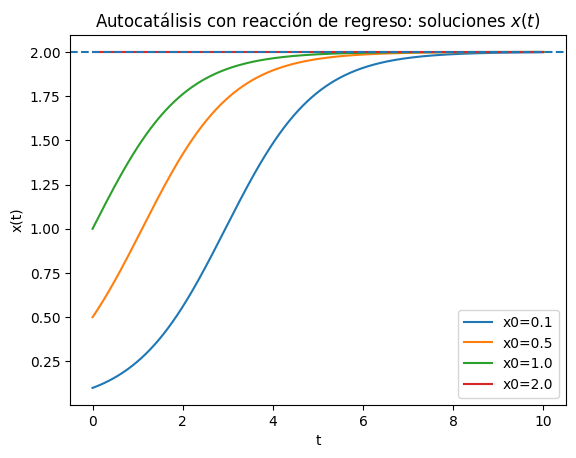

In [3]:

import matplotlib.pyplot as plt

plt.figure()
for x0, x in zip(x0_list, sols):
    plt.plot(t, x, label=f"x0={x0}")
plt.axhline(K, linestyle="--")
plt.title("Autocatálisis con reacción de regreso: soluciones $x(t)$")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend()
plt.show()


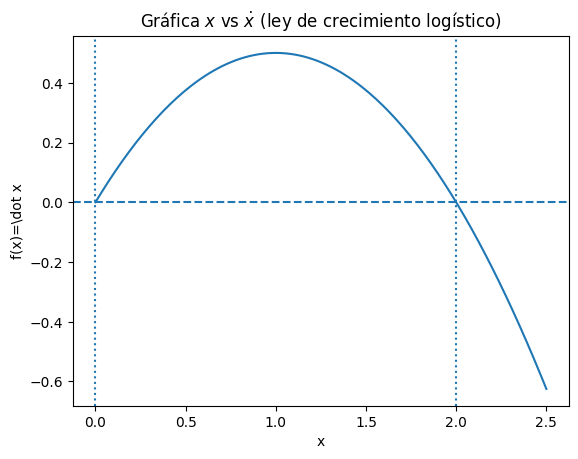

In [4]:

# Diagrama x vs x' (campo en el eje): fase 1D
xs = np.linspace(0, max(2.5, 1.1*K), 200)
f = k1*a*xs - k_1*xs**2

plt.figure()
plt.plot(xs, f)
plt.axhline(0, linestyle="--")
plt.axvline(0, linestyle=":")
plt.axvline(K, linestyle=":")
plt.title("Gráfica $x$ vs $\\dot x$ (ley de crecimiento logístico)")
plt.xlabel("x")
plt.ylabel("f(x)=\\dot x")
plt.show()


In [5]:

try:
    from ipywidgets import interact, FloatSlider

    def plot_solutions(k1_=1.0, k_1_=0.5, a_=1.0):
        t = np.linspace(0, 10, 400)
        K = (k1_ * a_) / k_1_ if k_1_ != 0 else np.nan
        plt.figure()
        for x0 in x0_list:
            x = logistic_solution(t, x0, k1_, k_1_, a_)
            plt.plot(t, x, label=f"x0={x0}")
        if np.isfinite(K):
            plt.axhline(K, linestyle="--")
        plt.title("Soluciones $x(t)$ con parámetros ajustables")
        plt.xlabel("t"); plt.ylabel("x(t)"); plt.legend(); plt.show()

        # x vs x'
        xs = np.linspace(0, max(2.5, 1.1*K if np.isfinite(K) else 2.5), 200)
        plt.figure()
        plt.plot(xs, k1_*a_*xs - k_1_*xs**2)
        plt.axhline(0, linestyle="--")
        if np.isfinite(K):
            plt.axvline(K, linestyle=":")
        plt.title("Gráfica $x$ vs $\\dot x$")
        plt.xlabel("x"); plt.ylabel("f(x)"); plt.show()

    interact(
        plot_solutions,
        k1_=FloatSlider(min=0.1, max=3.0, step=0.1, value=1.0),
        k_1_=FloatSlider(min=0.1, max=3.0, step=0.1, value=0.5),
        a_=FloatSlider(min=-1.0, max=2.0, step=0.1, value=1.0),
    )
except Exception as e:
    print("Interactividad no disponible:", e)


interactive(children=(FloatSlider(value=1.0, description='k1_', max=3.0, min=0.1), FloatSlider(value=0.5, desc…

## <span style="font-family:Georgia; text-align:center;">Ejemplo: Cinética química con autocatálisis y consumo</span>
<span style="font-family:Georgia;">

Analizamos el sistema
$$
A + X \;\xrightleftharpoons[k_{-1}]{k_1}\; 2X,
\qquad
X + B \;\xrightarrow{k_2}\; C,
$$
manteniendo $[A]=a$ y $[B]=b$ constantes. Denotemos $x=[X]$.

### <span style="font-family:Georgia; text-align:center;">Derivación de la ecuación</span>
<span style="font-family:Georgia;">

- Reacción directa $A+X\to 2X$: velocidad $v_1 = k_1\,a\,x$.
- Reacción inversa $2X\to A+X$: velocidad $v_{-1} = k_{-1}\,x^2$.
- Consumo $X+B\to C$: velocidad $v_2 = k_2\,b\,x$.

Sumando contribuciones, la ecuación para $x$ es
$$
\dot x \;=\; (+1)\,v_1 \;-\; (1)\,v_{-1} \;-\; (1)\,v_2
\;=\; k_1 a\,x \;-\; k_{-1} x^2 \;-\; k_2 b\,x.
$$
Por tanto
$$
\boxed{\;\dot x = c_1 x - c_2 x^2,\qquad c_1 = k_1 a - k_2 b,\quad c_2 = k_{-1}>0\;}
$$
que es una **ecuación logística generalizada**.

### <span style="font-family:Georgia; text-align:center;">Equilibrios y estabilidad</span>
<span style="font-family:Georgia;">

Sea $f(x)=c_1 x - c_2 x^2 = x(c_1 - c_2 x)$. Los **equilibrios** son
$$
x^*_0=0,\qquad x^*_+=\frac{c_1}{c_2}=\frac{k_1 a - k_2 b}{k_{-1}}\quad (\text{si }c_1>0).
$$
La derivada es $f'(x)=c_1 - 2c_2 x$. En $x^*=0$, $f'(0)=c_1$.
- Si $k_2 b > k_1 a$ ($c_1<0$), entonces $f'(0)<0$ y $x^*=0$ es **estable**. Químicamente, el **consumo por $B$ domina** la producción autocalítica, por lo que $X$ tiende a **extinguirse**.
- Si $k_2 b < k_1 a$ ($c_1>0$), el equilibrio $x^*=0$ es **inestable** y aparece $x^*_+>0$ **estable** (capacidad de carga).
- En $k_2 b = k_1 a$ ($c_1=0$) ocurre un **cambio de estabilidad**: umbral entre extinción y persistencia.

Esto constituye una **bifurcación transcrítica** en el parámetro $c_1=k_1 a - k_2 b$.


### <span style="font-family:Georgia; text-align:center;">Solución explícita</span>
<span style="font-family:Georgia;">

Para $c_1\ne 0$ (logística clásica con $r=c_1$, $K=c_1/c_2$):
$$
x(t) \;=\; \frac{K\,x_0}{\,x_0 + (K-x_0)\,e^{-c_1 t}\,}.
$$
Para $c_1=0$ se obtiene $\dot x = -c_2 x^2$, cuya solución es
$$
\frac{1}{x(t)} \;=\; \frac{1}{x_0} + c_2 t.
$$


In [7]:

import numpy as np
import matplotlib.pyplot as plt

# Parámetros 
k1  = 1.0
km1 = 0.5     # k_{-1}
k2  = 0.7
a   = 1.0
b   = 1.0

def c1(k1,a,k2,b): return k1*a - k2*b
def c2(km1): return km1

def solution(t, x0, k1=1.0, km1=0.5, k2=0.7, a=1.0, b=1.0):
    r = c1(k1,a,k2,b)
    beta = c2(km1)
    if np.isclose(r, 0.0):
        # dx/dt = - beta x^2
        return np.where(x0>0, 1.0/(1.0/x0 + beta*t), np.zeros_like(t))
    K = r / beta
    return (K * x0) / (x0 + (K - x0) * np.exp(-r * t))

# Malla temporal y CI
t  = np.linspace(0, 20, 600)
x0_list = [0.05, 0.2, 0.8, 1.5]

r = c1(k1,a,k2,b); beta = c2(km1); K = r/beta if beta!=0 else np.nan
r, beta, K


(0.30000000000000004, 0.5, 0.6000000000000001)

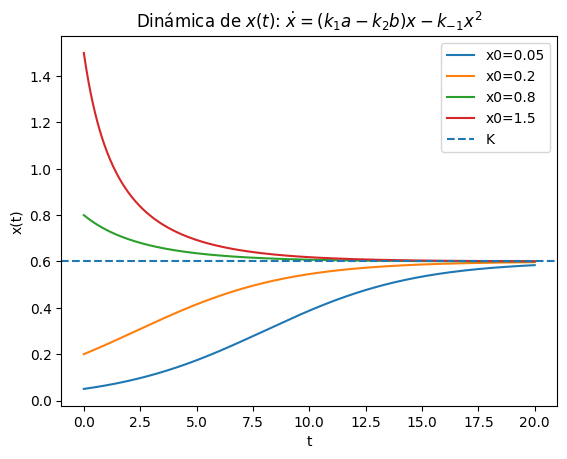

In [8]:

plt.figure()
for x0 in x0_list:
    x = solution(t, x0, k1, km1, k2, a, b)
    plt.plot(t, x, label=f"x0={x0}")
if np.isfinite(K):
    plt.axhline(K, linestyle="--", label="K" if K>0 else "K (<=0)")
plt.title("Dinámica de $x(t)$: $\\dot x = (k_1 a - k_2 b)x - k_{-1}x^2$")
plt.xlabel("t"); plt.ylabel("x(t)"); plt.legend(); plt.show()


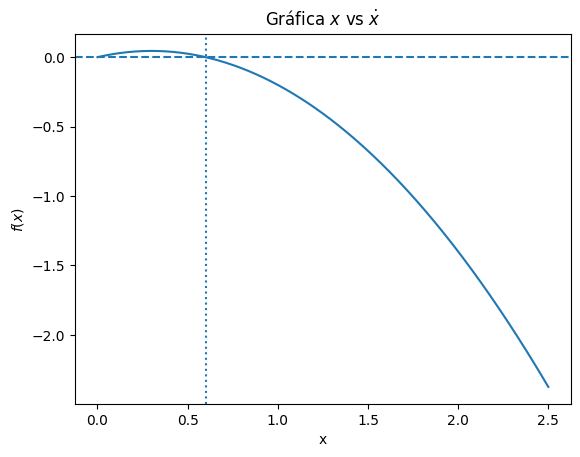

In [9]:
xs = np.linspace(0, max(2.5, 1.2*abs(K) if np.isfinite(K) else 2.5), 300)
f  = (k1*a - k2*b)*xs - km1*xs**2

plt.figure()
plt.plot(xs, f)
plt.axhline(0, linestyle="--")
if np.isfinite(K):
    plt.axvline(max(0.0, K), linestyle=":")
plt.title("Gráfica $x$ vs $\\dot x$")
plt.xlabel("x"); plt.ylabel("$f(x)$"); plt.show()

In [10]:

try:
    from ipywidgets import interact, FloatSlider

    def explore(k1_=1.0, km1_=0.5, k2_=0.7, a_=1.0, b_=1.0):
        t = np.linspace(0, 20, 600)
        r = c1(k1_,a_,k2_,b_); beta = c2(km1_); K = r/beta if beta!=0 else np.nan

        plt.figure()
        for x0 in [0.05, 0.2, 0.8, 1.5]:
            x = solution(t, x0, k1_, km1_, k2_, a_, b_)
            plt.plot(t, x, label=f"x0={x0}")
        if np.isfinite(K):
            plt.axhline(K, linestyle="--", label="K")
        plt.title(f"x(t) con r=k1 a - k2 b = {r:.3f}")
        plt.xlabel("t"); plt.ylabel("x(t)"); plt.legend(); plt.show()

        xs = np.linspace(0, max(2.5, 1.2*abs(K) if np.isfinite(K) else 2.5), 300)
        f  = (k1_*a_ - k2_*b_)*xs - km1_*xs**2
        plt.figure()
        plt.plot(xs, f)
        plt.axhline(0, linestyle="--")
        if np.isfinite(K):
            plt.axvline(max(0.0, K), linestyle=":")
        plt.title("x vs $\\dot x$"); plt.xlabel("x"); plt.ylabel("f(x)"); plt.show()

    interact(
        explore,
        k1_=FloatSlider(min=0.0, max=3.0, step=0.05, value=1.0),
        km1_=FloatSlider(min=0.05, max=3.0, step=0.05, value=0.5),
        k2_=FloatSlider(min=0.0, max=3.0, step=0.05, value=0.7),
        a_=FloatSlider(min=0.0, max=2.0, step=0.05, value=1.0),
        b_=FloatSlider(min=0.0, max=2.0, step=0.05, value=1.0),
    )
except Exception as e:
    print("Interactividad no disponible:", e)


interactive(children=(FloatSlider(value=1.0, description='k1_', max=3.0, step=0.05), FloatSlider(value=0.5, de…